In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# missing valu imputation (mode)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df=pd.read_csv("data/titanic_toy.csv")

In [4]:
df.head(5)

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [5]:
df.shape


(891, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [7]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

# Perform train test split

In [8]:
x=df.drop(columns=['Survived'])
y=df['Survived']


In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [10]:
x_train.shape,x_test.shape

((712, 3), (179, 3))

# x_train.isnull().mean()


# calculating mean and median of age and fare

In [11]:
mean_age=x_train['Age'].mean()
median_age=x_train['Age'].median()
mean_fare=x_train['Fare'].mean()
median_fare=x_train['Fare'].median()





# creating new column and impute missing values

In [12]:
x_train['Age_median']=x_train['Age'].fillna(median_age)
x_train['Age_mean']=x_train['Age'].fillna(mean_age)

x_train['Fare_median']=x_train['Fare'].fillna(median_fare)
x_train['Fare_mean']=x_train['Fare'].fillna(mean_fare)

In [13]:
x_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
445,4.0,81.8583,2,4.0,4.0,81.8583,81.8583
191,19.0,13.0000,0,19.0,19.0,13.0000,13.0000
671,31.0,52.0000,1,31.0,31.0,52.0000,52.0000
56,21.0,10.5000,0,21.0,21.0,10.5000,10.5000
125,12.0,11.2417,1,12.0,12.0,11.2417,11.2417


In [14]:
x_train.isnull().sum()

Age            148
Fare            36
Family           0
Age_median       0
Age_mean         0
Fare_median      0
Fare_mean        0
dtype: int64

In [15]:
x_train.sample(25)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
485,NaN,25.4667,4,28.75,29.785904,25.4667,25.4667
293,24.0,8.8500,0,24.00,24.000000,8.8500,8.8500
599,49.0,56.9292,1,49.00,49.000000,56.9292,56.9292
550,17.0,110.8833,2,17.00,17.000000,110.8833,110.8833
374,3.0,21.0750,4,3.00,3.000000,21.0750,21.0750
11,58.0,26.5500,0,58.00,58.000000,26.5500,26.5500
320,22.0,7.2500,0,22.00,22.000000,7.2500,7.2500
182,9.0,31.3875,6,9.00,9.000000,31.3875,31.3875
217,42.0,27.0000,1,42.00,42.000000,27.0000,27.0000
798,30.0,7.2292,0,30.00,30.000000,7.2292,7.2292


# review variance

In [16]:
print("Original Age variable variance:", x_train['Age'].var())
print("Age Variance after median imputation:",x_train['Age_median'].var())
print("Age variance after mean imputation:",x_train['Age_mean'].var())

print("Original Fare variable variance:", x_train['Fare'].var())
print("Fare Variance after median imputation:",x_train['Fare_median'].var())
print("Fare variance after mean imputation:",x_train['Fare_mean'].var())

Original Age variable variance: 204.3495133904614
Age Variance after median imputation: 161.9895663346054
Age variance after mean imputation: 161.81262452718673
Original Fare variable variance: 2448.197913706318
Fare Variance after median imputation: 2340.0910219753637
Fare variance after mean imputation: 2324.2385256705547


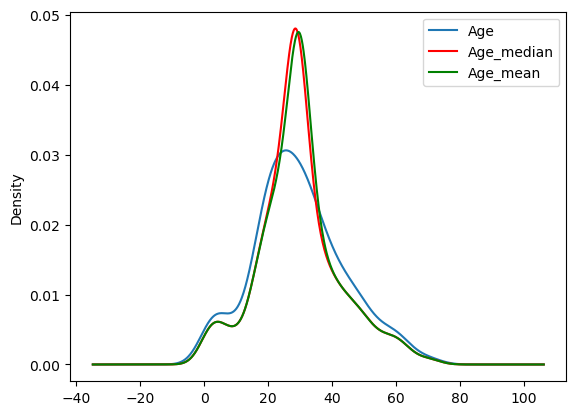

In [17]:
fig=plt.figure()
ax= fig.add_subplot(111)
x_train['Age'].plot(kind='kde',ax=ax)
x_train['Age_median'].plot(kind='kde',ax=ax,color='red')
x_train['Age_mean'].plot(kind='kde',ax=ax,color='green')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

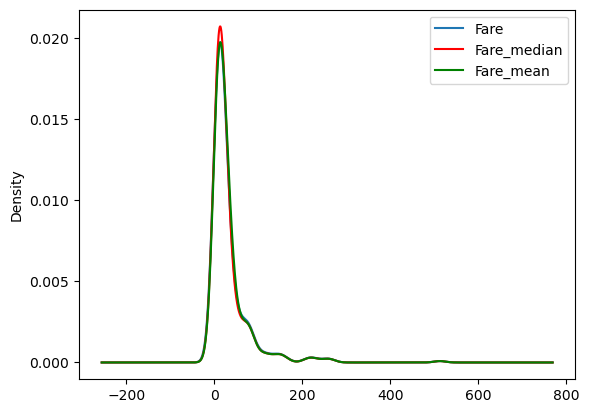

In [18]:
fig=plt.figure()
ax= fig.add_subplot(111)
x_train['Fare'].plot(kind='kde',ax=ax)
x_train['Fare_median'].plot(kind='kde',ax=ax,color='red')
x_train['Fare_mean'].plot(kind='kde',ax=ax,color='green')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [19]:
x_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,64.858859,66.665205
Fare,70.719262,2448.197914,17.258917,57.957599,55.603719,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.112563,-5.146106,16.476305,16.385048
Age_median,204.349513,57.957599,-5.112563,161.989566,161.812625,53.553455,55.023037
Age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,51.358000,52.788341
Fare_median,64.858859,2448.197914,16.476305,53.553455,51.358000,2340.091022,2324.238526
Fare_mean,66.665205,2448.197914,16.385048,55.023037,52.788341,2324.238526,2324.238526


In [20]:
x_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.087356,0.090156
Fare,0.092644,1.000000,0.208268,0.091757,0.088069,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.242883,-0.244610,0.205942,0.205499
Age_median,1.000000,0.091757,-0.242883,1.000000,0.999454,0.086982,0.089673
Age_mean,1.000000,0.088069,-0.244610,0.999454,1.000000,0.083461,0.086078
Fare_median,0.087356,1.000000,0.205942,0.086982,0.083461,1.000000,0.996607
Fare_mean,0.090156,1.000000,0.205499,0.089673,0.086078,0.996607,1.000000


<Axes: >

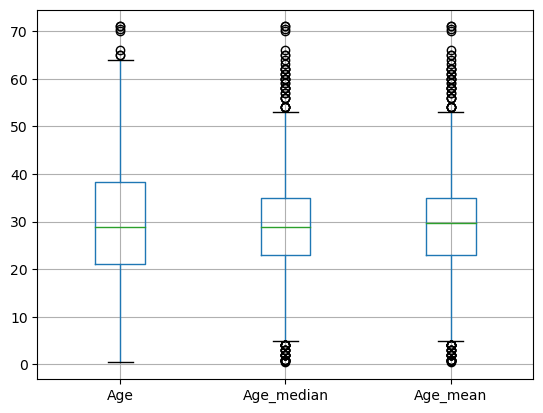

In [21]:
x_train[['Age','Age_median','Age_mean']].boxplot()

<Axes: >

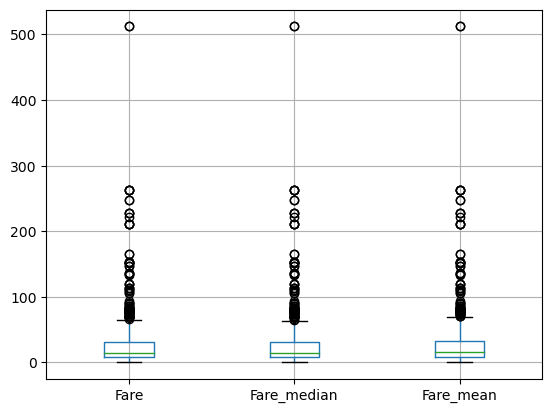

In [22]:
x_train[['Fare','Fare_median','Fare_mean']].boxplot()

# Arbitary Value Imputation

replacing the null value with  randomly 

In [23]:
df=pd.read_csv("data/titanic_toy.csv")

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [25]:
df.head(3)

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1


In [26]:
x=df.drop(columns=['Survived'])
y=df['Survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [27]:
x_train['Age_99']=x_train['Age'].fillna(99)
x_train['Age_minus']=x_train['Age'].fillna(-1)
x_train['Fare_999']=x_train['Fare'].fillna(999)
x_train['Fare_minus']=x_train['Fare'].fillna(-1)

In [28]:
x_train.sample(15)

,Age,Fare,Family,Age_99,Age_minus,Fare_999,Fare_minus
397,46.0,26.0000,0,46.0,46.0,26.0000,26.0000
262,52.0,79.6500,2,52.0,52.0,79.6500,79.6500
12,20.0,8.0500,0,20.0,20.0,8.0500,8.0500
472,33.0,27.7500,3,33.0,33.0,27.7500,27.7500
175,18.0,7.8542,2,18.0,18.0,7.8542,7.8542
524,NaN,7.2292,0,99.0,-1.0,7.2292,7.2292
489,9.0,15.9000,2,9.0,9.0,15.9000,15.9000
872,33.0,5.0000,0,33.0,33.0,5.0000,5.0000
530,2.0,26.0000,2,2.0,2.0,26.0000,26.0000
538,NaN,14.5000,0,99.0,-1.0,14.5000,14.5000


In [29]:
print("Original Age variable variance:", x_train['Age'].var())
print("Age Variance after median imputation:",x_train['Age_99'].var())
print("Age variance after mean imputation:",x_train['Age_minus'].var())

print("Original Fare variable variance:", x_train['Fare'].var())
print("Fare Variance after median imputation:",x_train['Fare_999'].var())
print("Fare variance after mean imputation:",x_train['Fare_minus'].var())

Original Age variable variance: 204.3495133904614
Age Variance after median imputation: 951.7275570187172
Age variance after mean imputation: 318.0896202624484
Original Fare variable variance: 2448.197913706318
Fare Variance after median imputation: 47219.20265217623
Fare variance after mean imputation: 2378.5676784883503


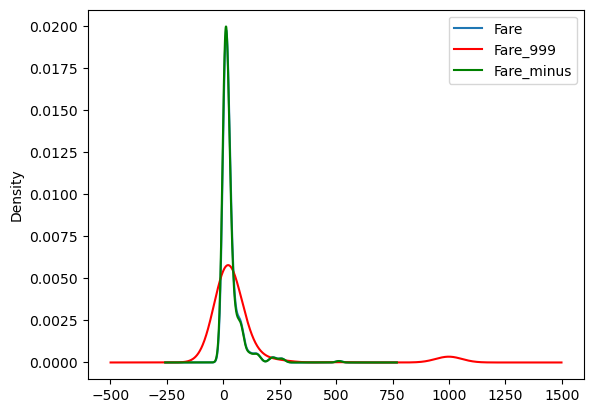

In [30]:
fig=plt.figure()
ax= fig.add_subplot(111)
x_train['Fare'].plot(kind='kde',ax=ax)
x_train['Fare_999'].plot(kind='kde',ax=ax,color='red')
x_train['Fare_minus'].plot(kind='kde',ax=ax,color='green')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

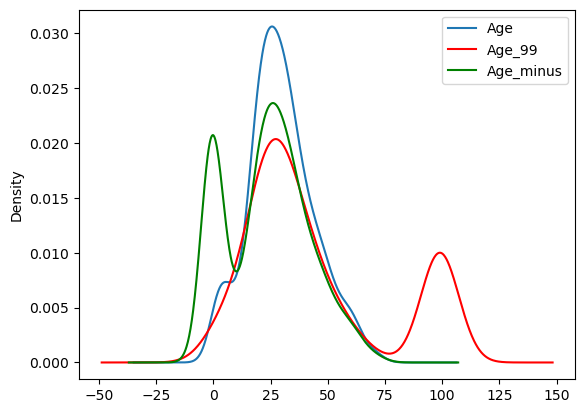

In [31]:
fig=plt.figure()
ax= fig.add_subplot(111)
x_train['Age'].plot(kind='kde',ax=ax)
x_train['Age_99'].plot(kind='kde',ax=ax,color='red')
x_train['Age_minus'].plot(kind='kde',ax=ax,color='green')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [32]:
df.head(5)

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [33]:
dff=pd.read_csv("data/train.csv")

In [34]:
dff.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [35]:
dff.shape

(1460, 81)

# Doing excersice for mode (filling categorical data)

In [36]:
dff=pd.read_csv("data/train.csv",usecols=['GarageQual','FireplaceQu','SalePrice'])

In [37]:
dff.head(5)

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [38]:
dff['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

In [39]:
dff['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

In [40]:
dff['SalePrice'].mode()

0    140000
Name: SalePrice, dtype: int64

# checking missing value

In [41]:
dff.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

# plot var for garage

<Axes: xlabel='GarageQual'>

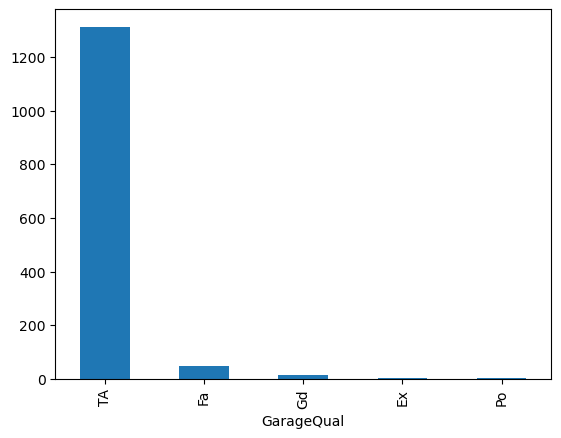

In [42]:
dff['GarageQual'].value_counts().plot(kind='bar')

In [43]:
dff['GarageQual'].value_counts()

GarageQual
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64

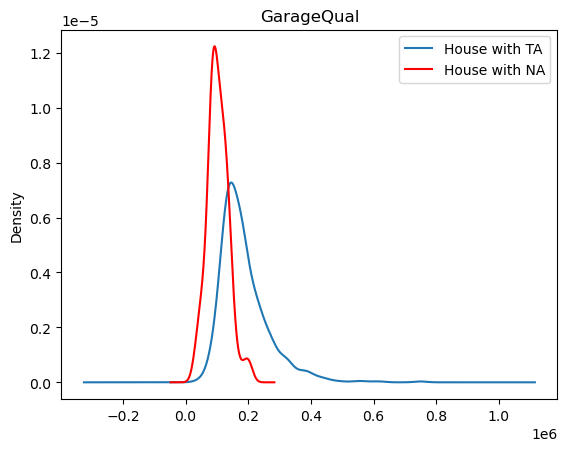

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111)
dff[dff['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde', ax=ax)
dff[dff['GarageQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
labels = ['House with TA', 'House with NA']
ax.legend(lines, labels, loc='best')  # Fixed typo, it should be ax.legend() not ax.length()
plt.title('GarageQual')
plt.show()


In [45]:
temp=dff[dff['GarageQual']=='TA']['SalePrice']

In [46]:
dff['GarageQual'].fillna('TA',inplace=True)

<Axes: xlabel='GarageQual'>

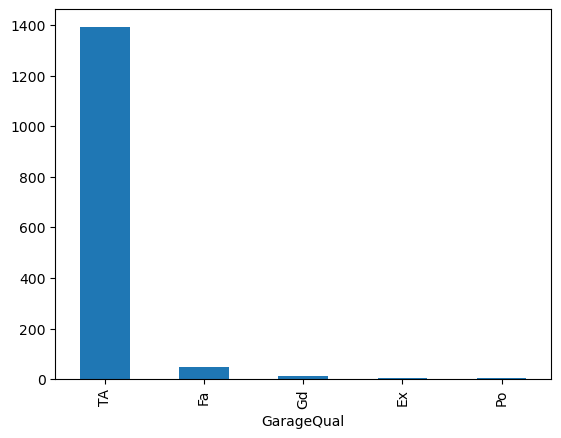

In [47]:
dff['GarageQual'].value_counts().plot(kind='bar')

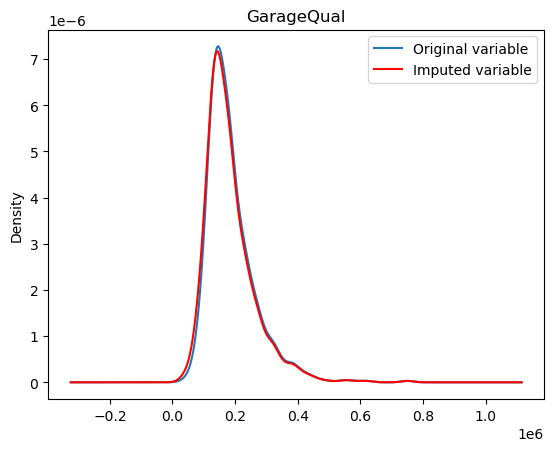

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111)
temp.plot(kind='kde', ax=ax)

dff[dff['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')  # Fixed typo, it should be ax.legend() not ax.length()
plt.title('GarageQual')
plt.show()


<Axes: xlabel='FireplaceQu'>

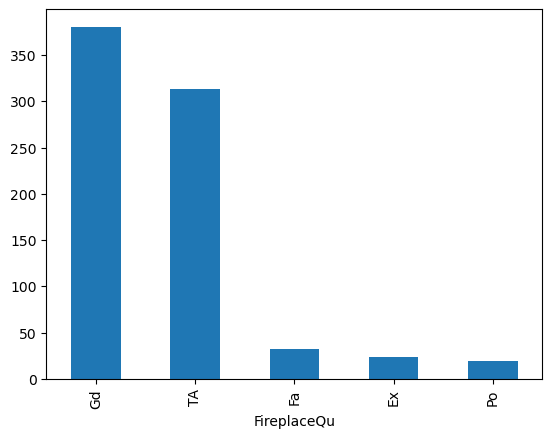

In [49]:
dff['FireplaceQu'].value_counts().plot(kind='bar')

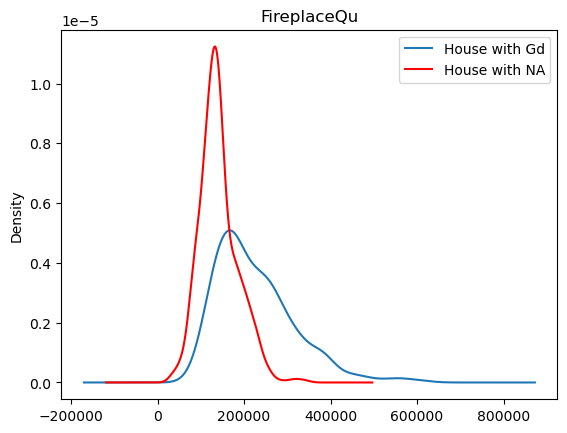

In [50]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
dff[dff['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde', ax=ax)
dff[dff['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')  # Corrected syntax error
lines, labels = ax.get_legend_handles_labels()
labels = ['House with Gd', 'House with NA']
ax.legend(lines, labels, loc='best')
plt.title('FireplaceQu')
plt.show()


In [51]:
temp=dff[dff['FireplaceQu']=='Gd']['SalePrice']

In [52]:
dff['FireplaceQu'].fillna('Gd',inplace=True)

<Axes: xlabel='FireplaceQu'>

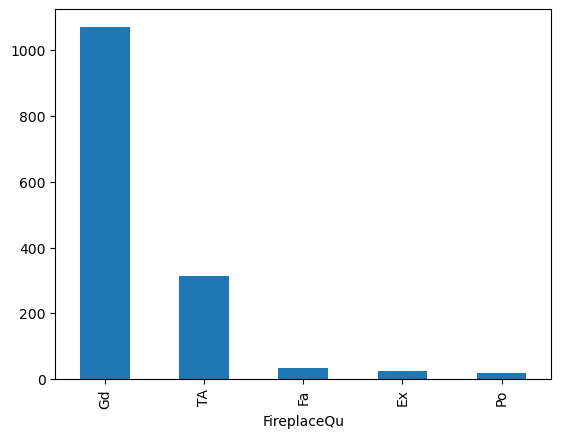

In [53]:
dff['FireplaceQu'].value_counts().plot(kind='bar')

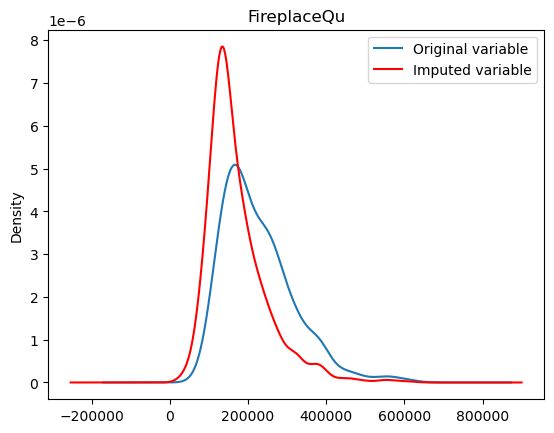

In [60]:
fig = plt.figure()
ax = fig.add_subplot(111)
temp.plot(kind='kde', ax=ax)
# distribution of the variable after imputation
dff[dff['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')
# add title
plt.title('FireplaceQu')

plt.show()


# missing value imputation

In [61]:
dff.isnull().sum()

FireplaceQu    0
GarageQual     0
SalePrice      0
dtype: int64

In [64]:
ddf=pd.read_csv("data/train.csv",usecols=['GarageQual','FireplaceQu','SalePrice'])

In [65]:
ddf.head(5)

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [66]:
ddf.isnull().sum()

FireplaceQu    690
GarageQual      81
SalePrice        0
dtype: int64

In [67]:
ddf.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

<Axes: xlabel='GarageQual'>

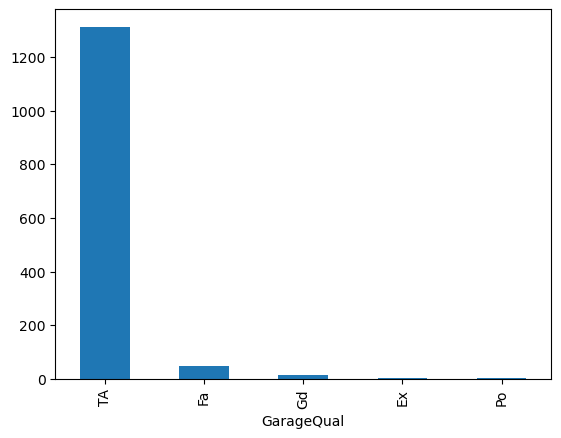

In [68]:
ddf['GarageQual'].value_counts().plot(kind='bar')

In [69]:
ddf['GarageQual'].fillna('Missing',inplace=True)

Text(0, 0.5, 'Number of houses')

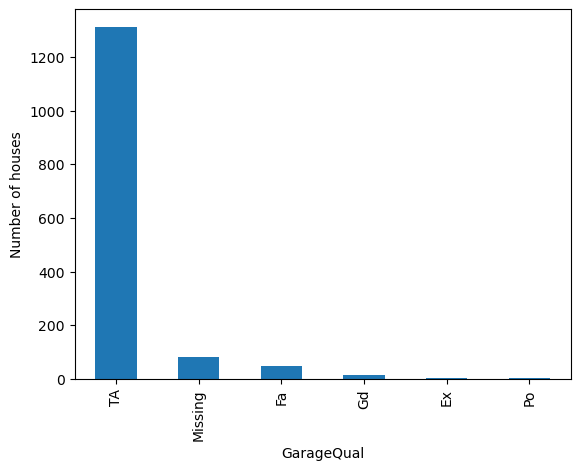

In [72]:
ddf["GarageQual"].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number of houses')